In [1]:
# Programmer : Qaidjohar Dama 
# College : Keystone SOE
# Class : TE-A
# Roll No : 13
# Problem Statement No : 4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('exercise.csv')
df

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [4]:
df = pd.read_csv('exercise.csv', index_col='Unnamed: 0')
df

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
...,...,...,...,...,...
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running
88,30,no fat,111,15 min,running


In [5]:
df.describe()

,id,pulse
count,90.000000,90.000000
mean,15.500000,99.700000
std,8.703932,14.858471
min,1.000000,80.000000
25%,8.000000,90.250000
50%,15.500000,96.000000
75%,23.000000,103.000000
max,30.000000,150.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      90 non-null     int64 
 1   diet    90 non-null     object
 2   pulse   90 non-null     int64 
 3   time    90 non-null     object
 4   kind    90 non-null     object
dtypes: int64(2), object(3)
memory usage: 4.2+ KB


## Q1. Print the total number of entries in the dataset.

In [7]:
df.shape

(90, 5)

In [8]:
df['id'].nunique()

30

### The Dataset has 90 entries of 30 Different People

## Q2. Plot the distribution of resting heart rates by diet type.

#### Types of Diet

In [9]:
df['diet'].value_counts()

diet
low fat    45
no fat     45
Name: count, dtype: int64

#### Resting Heart Rates

In [10]:
resting = df[df['kind']=='rest']

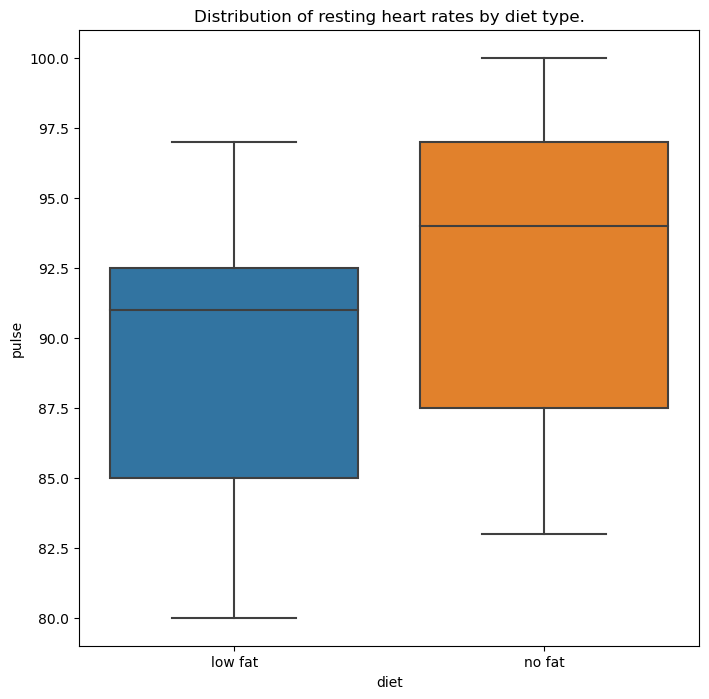

In [11]:
plt.figure(figsize=(8,8))
plt.xlabel('Diet Type')
plt.ylabel('Resting Heart Rate')
plt.title('Distribution of resting heart rates by diet type.')
sns.boxplot(x='diet', y='pulse', data = resting)
plt.show()

### People with Low Fat have an average Heart rate of 90 while resting
### People with No Fat have an average Heart rate of 95 while resting

## Q3. Plot the distribution of heart rates before and after exercise by diet type.

In [12]:
exercise = df[df['kind']!='rest']

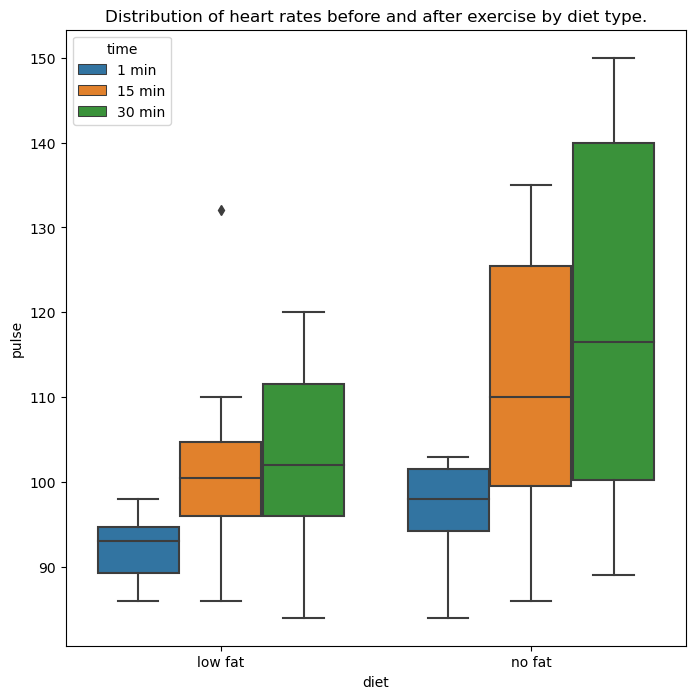

In [13]:
plt.figure(figsize=(8,8))
plt.xlabel('Diet Type')
plt.ylabel('Resting Heart Rate')
plt.title('Distribution of heart rates before and after exercise by diet type.')
sns.boxplot(x='diet', y='pulse', data = exercise, hue = 'time')
plt.show()

### People with Low Fat have a Heart rate increase from 90-95 Before Exercise to 95-110 After 30 Min of Exercise
### People with No Fat have a Heart rate Change from 95-100 Before Exercise to 110-130 After 30 Min of Exercise

## Q4. Calculate the average heart rate by diet type and activity level.

In [14]:
avg = df.groupby(['diet', 'kind'])['pulse'].mean().reset_index()

In [15]:
avg

,diet,kind,pulse
0,low fat,rest,89.333333
1,low fat,running,105.066667
2,low fat,walking,93.466667
3,no fat,rest,92.333333
4,no fat,running,121.066667
5,no fat,walking,96.933333


## Q5. Plot the average heart rate by diet type and activity level.

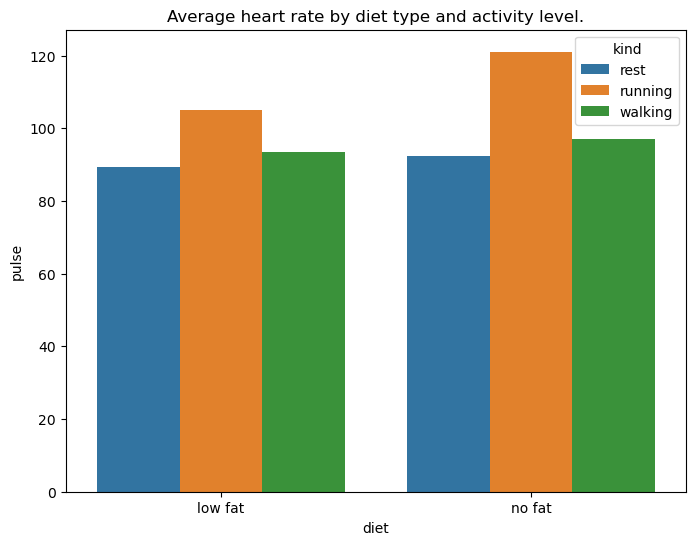

In [16]:
plt.figure(figsize=(8,6))
plt.xlabel('Diet Type and Activity Level')
plt.ylabel('Average Heart Rate')
plt.title('Average heart rate by diet type and activity level.')
sns.barplot(x='diet', y='pulse', data = avg, hue = 'kind')
plt.show()

## Q6. Print the names of individuals with the highest and lowest heart rates after exercise.

In [17]:
highest = exercise['pulse'].idxmax()
df.loc[highest,'id']

30

In [18]:
lowest = exercise['pulse'].idxmin()
df.loc[lowest,'id']

11

### Individual with Highest Heart Rate after Exercise is ID no 30
### Individual with Lowest Heart Rate after Exercise is ID no 11

## Q8. Calculate the median heart rate for each activity level.

In [19]:
df.groupby('kind')['pulse'].median().reset_index()

,kind,pulse
0,rest,91.5
1,running,110.0
2,walking,95.5


## Q9. Print the names of individuals with the highest and lowest heart rate differences between before and after exercise.

In [20]:
exercise_time_start_and_end = df[(df['time']!='15 min') & (df['kind']!='rest')]
exercise_time_start_and_end.head()

,id,diet,pulse,time,kind
30,11,low fat,86,1 min,walking
32,11,low fat,84,30 min,walking
33,12,low fat,93,1 min,walking
35,12,low fat,104,30 min,walking
36,13,low fat,90,1 min,walking


In [21]:
heart_rate_diff = abs(exercise_time_start_and_end.groupby('id')['pulse'].diff())
heart_rate_diff.head()

30     NaN
32     2.0
33     NaN
35    11.0
36     NaN
Name: pulse, dtype: float64

In [22]:
highest_diff = heart_rate_diff.idxmax()
df.loc[highest_diff,'id']

30

In [23]:
lowest_diff = heart_rate_diff.idxmin()
df.loc[lowest_diff,'id']

20

### Individual with Highest Heart Rate Difference is ID no 30
### Individual with Lowest Heart Rate Difference is ID no 20

## Q10.Plot the distribution of heart rate differences between before and after exercise by diet type.

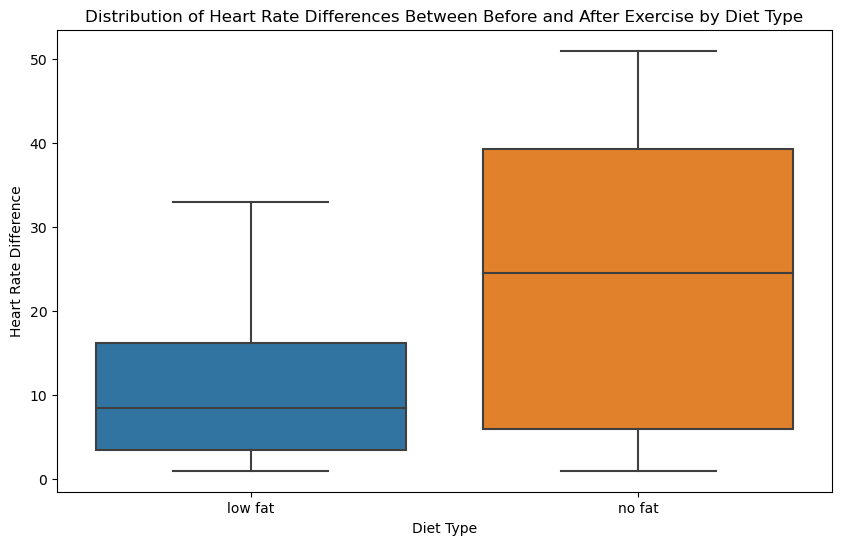

In [24]:
combined_data = pd.concat([heart_rate_diff, exercise_time_start_and_end['diet']], axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(x='diet', y='pulse', data=combined_data)
plt.title('Distribution of Heart Rate Differences Between Before and After Exercise by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('Heart Rate Difference')
plt.show()